# **About Dataset**

This is a small subset of dataset of headphone reviews from Amazon. The dataset has 6 columns🎧🎧🎧🎧

1. `Customer Name` -- name of customer who buy the product

2. `REVIEW_TITLE` -- review in short

3. `Color` -- color of the product

4. `REVIEW_DATE` -- date when customer gives rating for eg: 05-Sep-21

4. `COMMENTS` -- customers comment what are feeling of customer about product

5. `RATINGS` -- how customer rate out of 5 star for eg: 4/5

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 7)

headphone_reviews = pd.read_csv('headphone_data.csv')
print(headphone_reviews.head(2))

  Customer_Name                        REVIEW_TITLE  Color REVIEW_DATE  \
0       Ramdika       Really Exceed my expectation.  Black   30-May-21   
1     Sachin AK  Great for a change from inear buds  Black   01-Jun-21   

                                            COMMENTS  RATINGS  
0  Okay.. I was skeptical at first to buy this as...        5  
1  The earphone is worth what you pay for. The de...        5  


## Acknowledgements

This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mdwaquarazam/headphone-dataset-review-analysis) and from [Amazon product data](https://www.amazon.in/boat-headphones/s?k=boat+headphones)

# **Data to Use**

- Since this is a sentiment analysis, we'll concentrate on the columns `REVIEW_TITLE`, `COMMENTS` and `RATINGS`. Additionally, I'll use the assumption that for ratings 4 and 5, the rating will be used as `positive` which we'll be coded as 1. For rating equal to 3, the rating will be a `neutral` hence coded as 0. Finally for ratings 2 and 1, the rating will be `negative`, thus coded 2. 

In [2]:
headphone_reviews = headphone_reviews[['REVIEW_TITLE', 'COMMENTS', 'RATINGS']].dropna()
headphone_reviews['RATINGS'] = [1 if rate >=4 else 0 if rate == 3 else 2 for rate in headphone_reviews.RATINGS]
print(headphone_reviews.shape)
print(headphone_reviews.head(3))

(1538, 3)
                         REVIEW_TITLE  \
0       Really Exceed my expectation.   
1  Great for a change from inear buds   
2      For people with sensitive ears   

                                            COMMENTS  RATINGS  
0  Okay.. I was skeptical at first to buy this as...        1  
1  The earphone is worth what you pay for. The de...        1  
2  Particularly for people with sensitive ears, w...        1  


## String Frequency

- First, wordclouds will be created to see the frequency of words in the in `COMMENTS` column both the training and testing data. From the plots it is evident that the common words used in the comments are similar in both the training and test set.

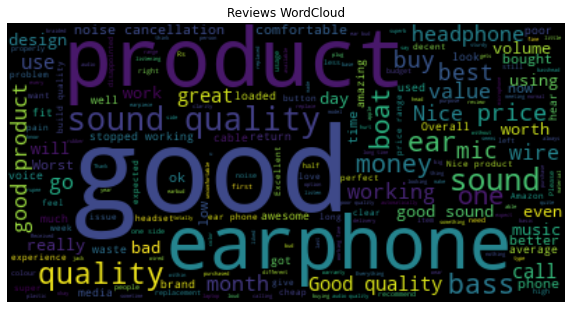

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(headphone_reviews.COMMENTS)

# Setting wordcloud to plot
cloud_reviews = WordCloud(height=200).generate(all_reviews)

# Plotting the wordcloud
plt.subplots(figsize=(10, 6))
plt.imshow(cloud_reviews, interpolation='bilinear')
plt.axis('off');
plt.title('Reviews WordCloud');

# **Provisional Model Building**

For this section, we'll create a logistic regression model without any adjustments to the data and see how our model performs.

## Creating a Vectorized DataFrame

In this section we'll use the TF-IDF Vectorizer because it penalizes most frequent words and gives weight to less frequent word in the corpus.

- For now, we'll use the the functionality with its default values. Only the `COMMENTS` column has been used.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_vectorizer = TfidfVectorizer().fit(headphone_reviews.COMMENTS)
comments_data = review_vectorizer.transform(headphone_reviews.COMMENTS).toarray()
review_df = pd.DataFrame(comments_data, columns=review_vectorizer.get_feature_names_out())
review_df

,00,10,100,...,yup,zero,zoom
0,0.0,0.0,0.000000,...,0.0,0.0,0.0
1,0.0,0.0,0.000000,...,0.0,0.0,0.0
2,0.0,0.0,0.000000,...,0.0,0.0,0.0
3,0.0,0.0,0.052903,...,0.0,0.0,0.0
4,0.0,0.0,0.000000,...,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1533,0.0,0.0,0.000000,...,0.0,0.0,0.0
1534,0.0,0.0,0.000000,...,0.0,0.0,0.0
1535,0.0,0.0,0.000000,...,0.0,0.0,0.0
1536,0.0,0.0,0.000000,...,0.0,0.0,0.0


## Training and Testing Data

Eighty percent of the data will be used to train the model. The use of `train_test_split()` was settled upon despite the dataset having labels that call for a multi-class classification solution because the split data have reasonable values. 

- Note that the features data `X` will be the vectorized `review_df` while the labels data will be extracted from the `RATINGS` column from the `headphone_reviews` dataset. 

In [5]:
from sklearn.model_selection import train_test_split

X = review_df
y = headphone_reviews.RATINGS

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, train_size=0.8, 
                     stratify=y, random_state=42)

pd.DataFrame({'training_data': y_train.value_counts(), 
              'testing_data': y_test.value_counts()})

,training_data,testing_data
1,706,177
2,406,101
0,118,30


## Building a Classifier

Here, a logistic regression model is trained to predict sentiment. In other words, the model a logistic regression model is trained and then its performance checked on test data to see how well the model performs.

- The default values are used. 

In [6]:
from sklearn.linear_model import LogisticRegression

prov_regressor = LogisticRegression().fit(X_train, y_train)
y_predicted = prov_regressor.predict(X_test)
y_predicted[:10]

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

## Accuracy of the Model

- Here we use `accuracy_score` and the `confusion_matrix` to check how the logistic regression model performed. An accuracy of 0.81 is good but our model did not even predict a `negative` score.  

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_predicted))
print('-'*40)
print(confusion_matrix(y_test, y_predicted) / len(y_test))

0.8084415584415584
----------------------------------------
[[0.         0.06818182 0.02922078]
 [0.         0.5487013  0.02597403]
 [0.         0.06818182 0.25974026]]
